In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# scipy.stats

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

scipy.stats содержит информацию о различных вероятностных распределениях, Дополняет содержимое numpy.random.

In [2]:
import scipy.stats

Сгенерируем выборку из нормального распределения

In [3]:
a = np.random.normal(size=10000)

Создадим гистограмму получившегося распределения, используя numpy.histogram

In [4]:
bins = np.arange(-5, 6, 0.1)

In [5]:
histogram = np.histogram(a, bins=bins, normed=True)[0]

In [6]:
bins_centers = 0.5 * (bins[1:] + bins[:-1])

Мы получили вот такое распределение

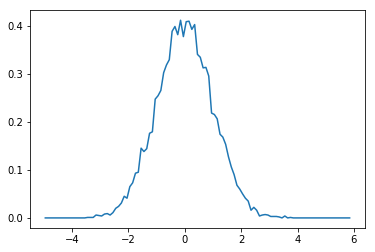

In [7]:
plt.plot(bins_centers, histogram) 
plt.show()

Мы можем посмотреть теоретическое распределение, используя scipy.stats

In [8]:
theoretic = scipy.stats.norm.pdf(bins_centers)

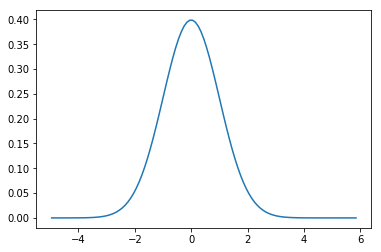

In [9]:
plt.plot(bins_centers, theoretic)
plt.show()

Изобразим на одном графике

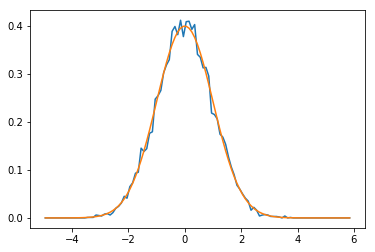

In [10]:
plt.plot(bins_centers, histogram) 
plt.plot(bins_centers, theoretic) 
plt.show()

Как мы видим распределения почти совпадают

Допустим у нас есть два набора данных

In [11]:
a = np.random.normal(10, 10, size=100)
b = np.random.normal(10, 1, size=100)

И мы хотим проверить, одинаковые у них средние или нет. При генерации мы указали одинаковые средние (и там и там 10).

In [12]:
print(np.mean(a))
print(np.mean(b))

10.95344371506523
10.035654245697275


Но средние получились разные. Это связано с тем, что выборки недостаточно большие и поэтому возможны разные случайные отклонения.

Ведь если мы будем бросать монетку, у нас может выпасть 7 орлов из 10, хотя в среднем орлов должна быть половина.

Вот если мы возьмём большую выборку, то средние будут похожие.

In [13]:
a = np.random.normal(10, 10, size=100000)
b = np.random.normal(10, 1, size=100000)

print(np.mean(a))
print(np.mean(b))

10.036603945594816
9.99847932600786


scipy предлагает разные способы проверки таких гипотез (совпадают средние или нет)

In [14]:
scipy.stats.ttest_ind(a, b)   

Ttest_indResult(statistic=1.1991794240012912, pvalue=0.23045960693010964)

если p-value меньше 0.05, то средние различаются

In [15]:
a = np.random.normal(10, 10, size=100)
b = np.random.normal(10, 1, size=100)

print(np.mean(a))
print(np.mean(b))

scipy.stats.ttest_ind(a, b)

11.057737429721806
10.068212979544642


Ttest_indResult(statistic=0.9806369245417103, pvalue=0.32796851265292015)

In [16]:
a = np.random.normal(10, 10, size=100000)
b = np.random.normal(10, 1, size=100000)

print(np.mean(a))
print(np.mean(b))

scipy.stats.ttest_ind(a, b)

9.991291148600009
9.993495762108134


Ttest_indResult(statistic=-0.0693661232465802, pvalue=0.9446982630262293)

In [17]:
a = np.random.normal(10, 10, size=100000)
b = np.random.normal(10.1, 1, size=100000)

print(np.mean(a))
print(np.mean(b))

scipy.stats.ttest_ind(a, b)

10.003554926697461
10.101185154125455


Ttest_indResult(statistic=-3.068844725462467, pvalue=0.002149169938073012)

# scipy.ndimage

https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage

scipy.ndimage предоставляет средства анализа картинок

In [18]:
import scipy.ndimage

Скачаем стандартную картинку с енотом

In [19]:
face = scipy.misc.face(gray=True)

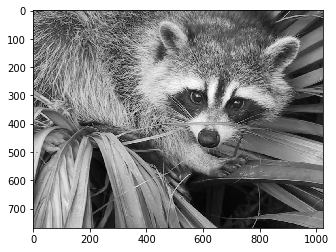

In [20]:
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

Действительно, енот

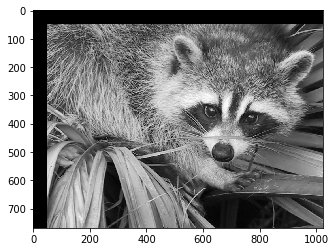

In [21]:
new_face = scipy.ndimage.shift(face, (50, 50))
plt.imshow(new_face, cmap=plt.cm.gray)
plt.show()

Появились чёрные полосы. Чтобы такого не было можем поставить наименования стратегии заполнения полос. В данном случае это взятие ближайшего пикселя.

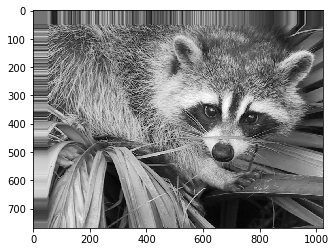

In [22]:
new_face = scipy.ndimage.shift(face, (50, 50), mode='nearest')
plt.imshow(new_face, cmap=plt.cm.gray)
plt.show()

Продолжим издеваться над бедным животным и теперь повернём его на 30 градусов.

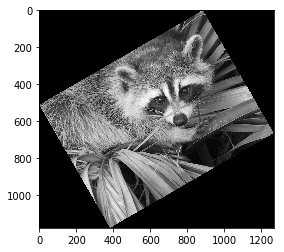

In [23]:
new_face = scipy.ndimage.rotate(face, 30)
plt.imshow(new_face, cmap=plt.cm.gray)
plt.show()

Или увеличим в 10 раз. (Обратите внимание на значения на осях)

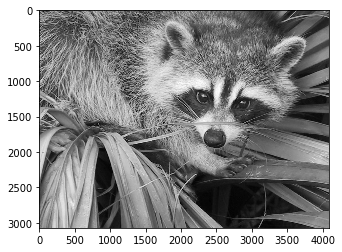

In [24]:
new_face = scipy.ndimage.zoom(face, 4)
plt.imshow(new_face, cmap=plt.cm.gray)
plt.show()

Представьте, что у нас оказался битый фотоаппарат, который при съёмке генерировал шумы и из-за этого получаются плохие фотографии.

In [25]:
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

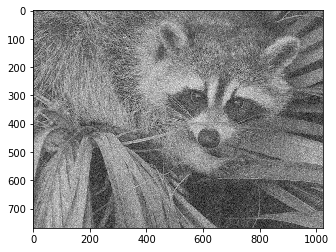

In [26]:
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.show()

Казалось бы, нам нетепрь не насладиться прекрасным видом енотика в высоком качестве. Но scipy.ndimage способен помочь в данной ситуации.

Зная информацию о соседних пикселях, можно скорректировать значение в текущем пикселе.

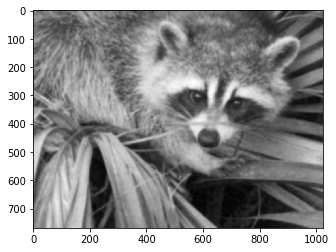

In [27]:
blurred_face = scipy.ndimage.gaussian_filter(noisy_face, sigma=3)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.show()

Получилось немного размыто

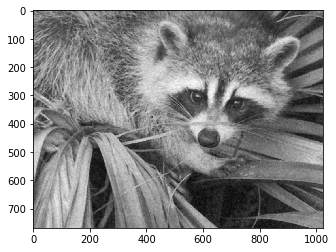

In [28]:
median_face = scipy.ndimage.median_filter(noisy_face, size=5)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.show()

А вот это очень хорошо получилось.

Есть ещё один способ использования этих фильтров: если сначала размазать изображение, а затем посмотреть на разность с изначальной картикой, то мы интересный визуальный эффект.

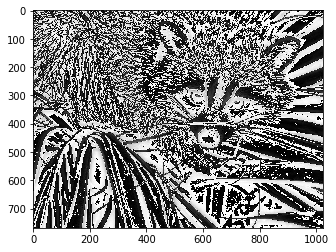

In [29]:
blurred_face = scipy.ndimage.gaussian_filter(face, sigma=10)
plt.imshow(face - blurred_face, cmap=plt.cm.gray)
plt.show()

Бинаризация изображений

![title](morpho_mat1.png)

In [30]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = scipy.ndimage.binary_opening(mask)
closed_mask = scipy.ndimage.binary_closing(opened_mask)

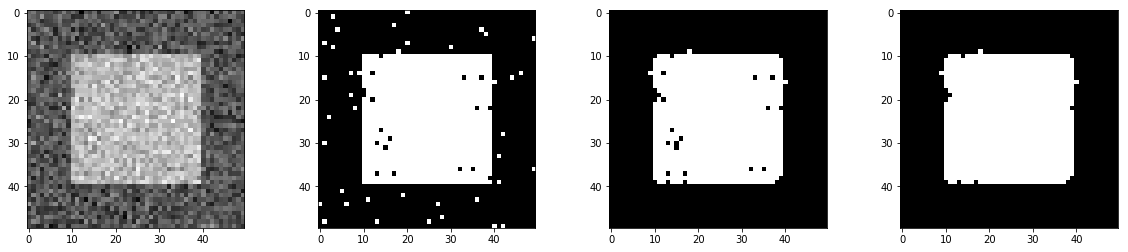

In [31]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.imshow(a, cmap=plt.cm.gray)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.subplot(1, 4, 3)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.subplot(1, 4, 4)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.show()

### Выводы:
scipy предоставляет широкий инструментарий для обработки картинок.

# Немного отдохнём от картинок

# scipy.interpolate

https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate

Интерполяция -  в вычислительной математике способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений. И scipy.interpolate предоставляет функционал для этого.

In [32]:
import scipy.interpolate

Загрузим данные. Величины замерялись каждый год в январе, а как менялось в промежуточное время неизвестно. Хочется распространить измерения на промежуточные точки.

In [33]:
max_speeds = np.load('max-speeds.npy')

In [34]:
original_points = list(range(max_speeds.shape[0]))

Исходные точки

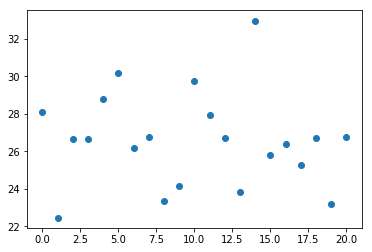

In [35]:
plt.scatter(original_points, max_speeds)
plt.show()

Самое просто - это линейно соединить точки

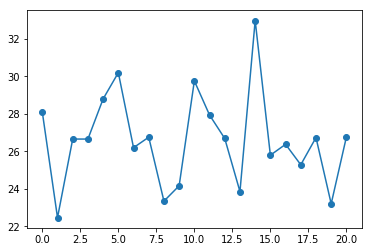

In [36]:
interp = scipy.interpolate.interp1d(original_points, max_speeds, kind='linear')

points = np.arange(0, 20.1, 0.1)

plt.scatter(original_points, max_speeds)
plt.plot(points, interp(points))
plt.show()

Но это не самое хорошее решение - у нас имеются изломы.

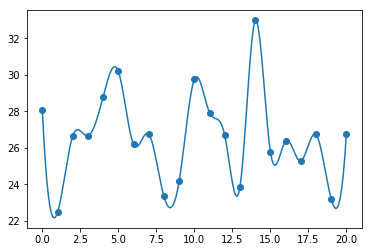

In [37]:
interp = scipy.interpolate.interp1d(original_points, max_speeds, kind='cubic')

points = np.arange(0, 20.1, 0.1)

plt.scatter(original_points, max_speeds)
plt.plot(points, interp(points))
plt.show()

Уже лучше, функция стало гладкойю Но если мы попробуем посчитать значение для не внутренней точки, то мы получим исключение

ValueError: A value in x_new is above the interpolation range.

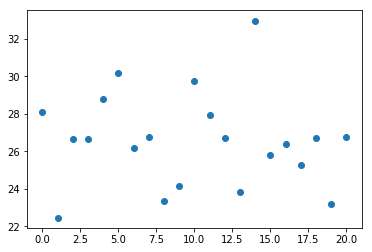

In [38]:
interp = scipy.interpolate.interp1d(original_points, max_speeds, kind='cubic')

points = np.arange(0, 21.1, 0.1)

plt.scatter(original_points, max_speeds)
plt.plot(points, interp(points))
plt.show()

Поэтому есть другие методы интерполяции, позволяющие выходить за границу имеющихся точек

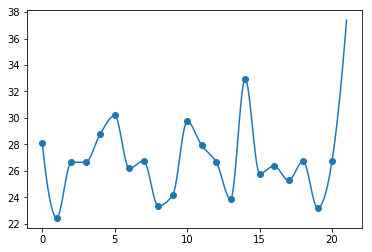

In [39]:
interp = scipy.interpolate.PchipInterpolator(np.array(original_points), np.array(max_speeds))

points = np.arange(0, 21.1, 0.1)

plt.scatter(original_points, max_speeds)
plt.plot(points, interp(points))
plt.show()

# Теперь снова вернёмся к картинкам

### Комбинирование модулей

Имеется картинка. Нужно обрезать от неё лишнюю часть и найти на ней три типа сущностей по цвету (чёрное это пустоота, тёмно серый это песок, а остальное это стекло).

In [42]:
picture = plt.imread('MV_HFV_012.jpg')

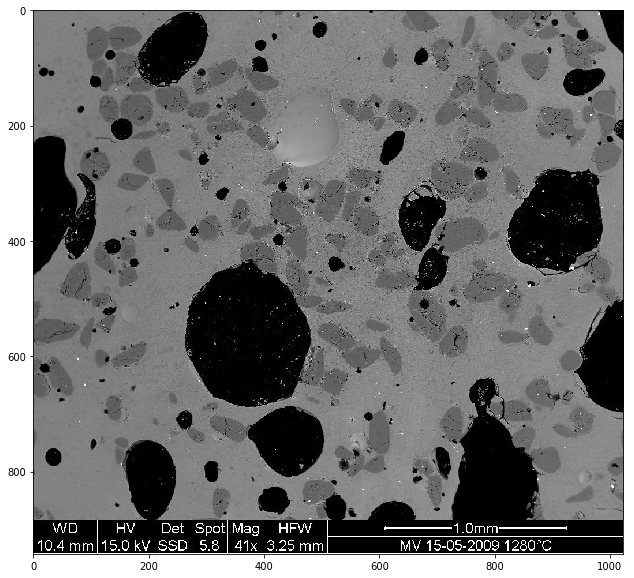

In [43]:
plt.figure(figsize=(12, 10))
plt.imshow(picture, cmap=plt.cm.gray)
plt.show()

Сначала обрежем нижнюю часть, так как она нам не нужна

In [44]:
picture = picture[:-60]

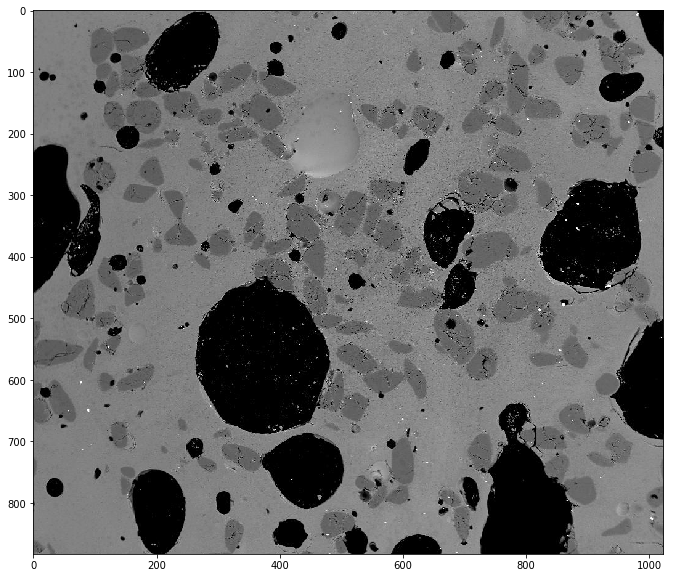

In [45]:
plt.figure(figsize=(12, 10))
plt.imshow(picture, cmap=plt.cm.gray)
plt.show()

Мы видим, что  на изоюбражении есть шумы и мелкие точки. Поэтоум используем фильтр, чтобы их убрать.

In [46]:
filtered_picture = scipy.ndimage.median_filter(picture, size=(7,7))

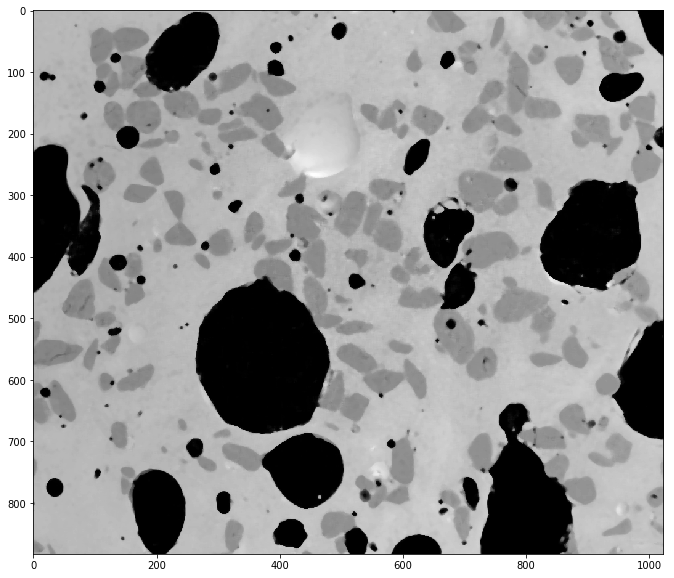

In [47]:
plt.figure(figsize=(12, 10))
plt.imshow(filtered_picture, cmap=plt.cm.gray)
plt.show()

Построим гистограмму распределения цветов на картинке (изначальной и после фильтра), чтобы понять где ставить границы

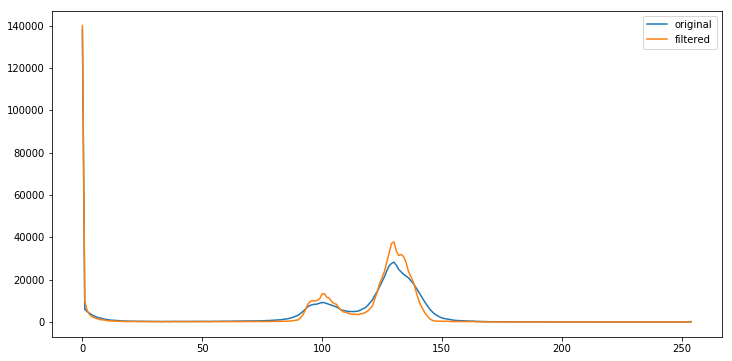

In [48]:
origin_hist = np.histogram(picture, bins=np.arange(256))
filtered_hist = np.histogram(filtered_picture, bins=np.arange(256))

plt.figure(figsize=(12, 6))
plt.plot(np.arange(255), origin_hist[0]) 
plt.plot(np.arange(255), filtered_hist[0]) 
plt.legend(['original', 'filtered'])
plt.show()

Пики стали более явными. Теперь можем назначить пороги.

In [49]:
void = filtered_picture <= 75
sand = (filtered_picture > 75) & (filtered_picture <= 114)
glass = filtered_picture > 114

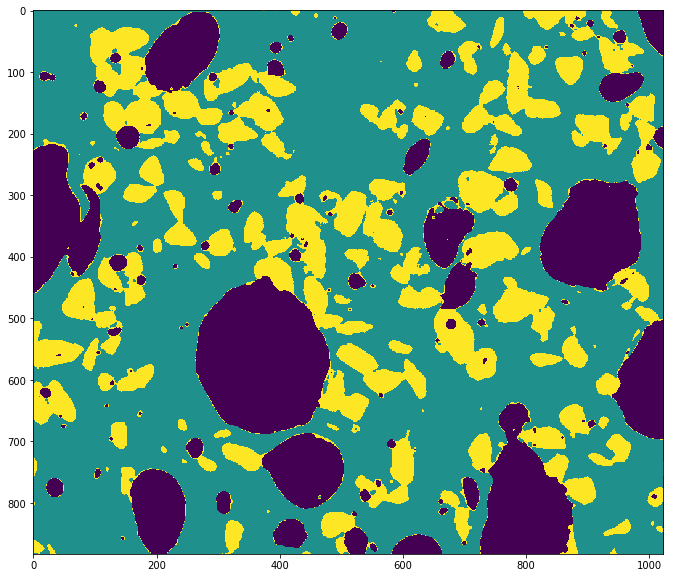

In [50]:
phases = void.astype(np.int) + 2 * glass.astype(np.int) + 3 * sand.astype(np.int)
plt.figure(figsize=(12, 10))
plt.imshow(phases)
plt.show()

Посмотрим на расположение песка

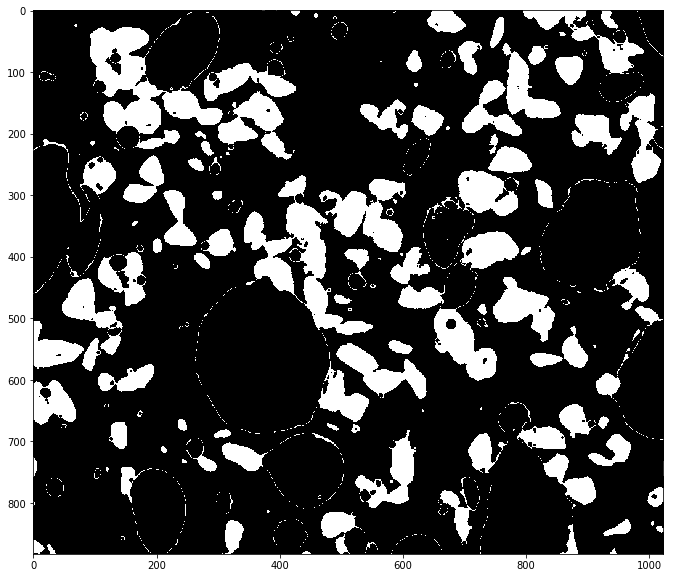

In [51]:
plt.figure(figsize=(12, 10))
plt.imshow(sand, cmap=plt.cm.gray)
plt.show()

Нужно убрать линии

In [52]:
sand_op = scipy.ndimage.binary_opening(sand, iterations=2)

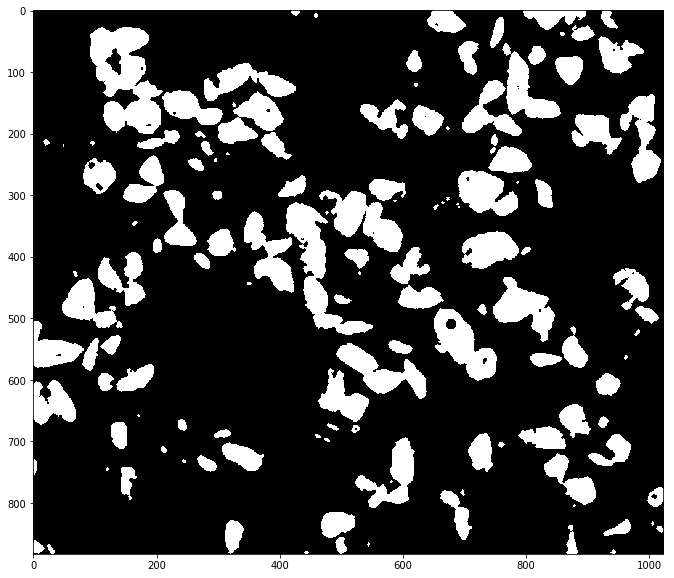

In [53]:
plt.figure(figsize=(12, 10))
plt.imshow(sand_op, cmap=plt.cm.gray)
plt.show()

Остались мелкие пятнышки, которые не убрали наши преобразованием. Но их уже не так много, как до преобразования. Поэтому для каждого пятнынка, мы можем вычилить его размер и удалить тех, кто содержить меньше 100 пикселей

In [54]:
sand_labels, sand_nb = scipy.ndimage.label(sand_op)
sand_areas = np.array(scipy.ndimage.sum(sand_op, sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas >= 100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)

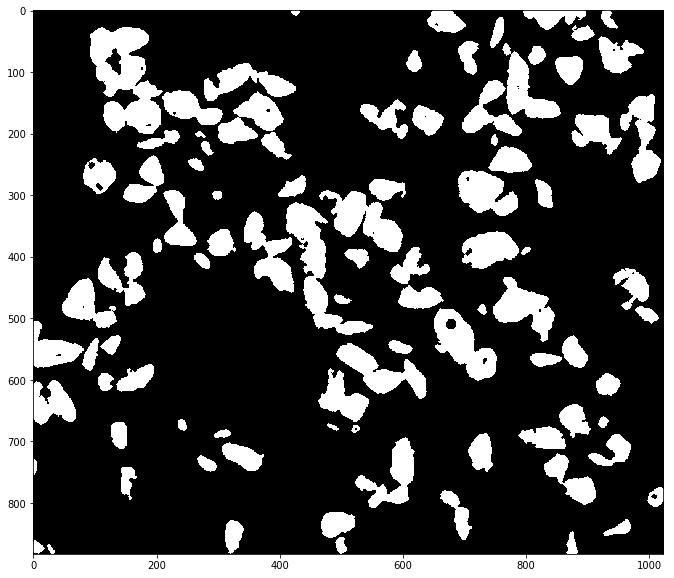

In [55]:
plt.figure(figsize=(12, 10))
plt.imshow(remove_small_sand, cmap=plt.cm.gray)
plt.show()

Аналогично упрощаем пустоту

In [56]:
void_op = scipy.ndimage.binary_opening(void, iterations=3)

Стекло это всё, что осталось

In [57]:
glass = (~void_op) & (~remove_small_sand)

И получаем итоговую картинку

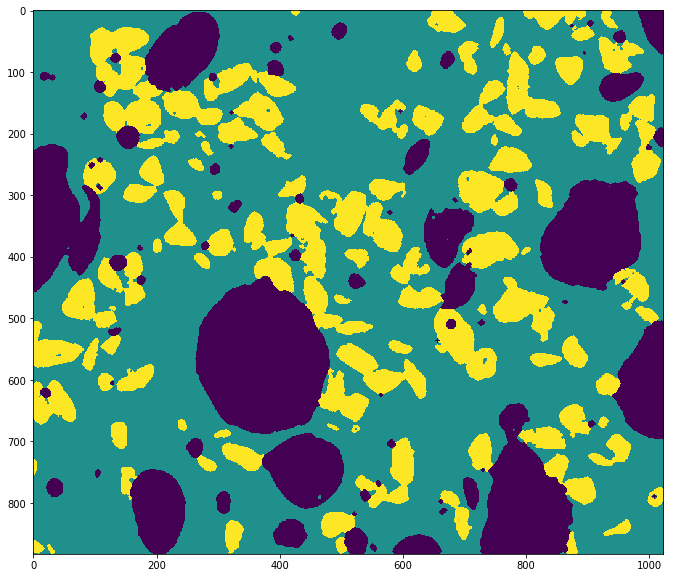

In [58]:
phases = void_op.astype(np.int) + 2 * glass.astype(np.int) + 3 * remove_small_sand.astype(np.int)
plt.figure(figsize=(12, 10))
plt.imshow(phases)
plt.show()